# 1. Data Description

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
training = pd.read_csv('datasets/train.csv')
testing = pd.read_csv('datasets/test.csv')
combined = pd.concat([training,testing],axis=0,ignore_index=True)

In [3]:
training.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
testing.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Data Visualization

In [5]:
null_counts = training.isnull().sum() #count the number of null values
print(null_counts)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
training.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# Combined Data Analysis

In [7]:
df = pd.concat([training,testing])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

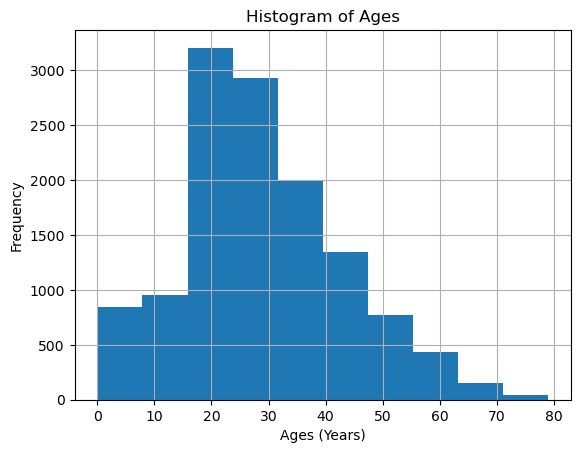

In [11]:
#Age Distribution
df['Age'].hist(bins=10)
plt.title("Histogram of Ages")
plt.xlabel('Ages (Years)')
plt.ylabel('Frequency')
plt.savefig('figures/age_distribution.png')

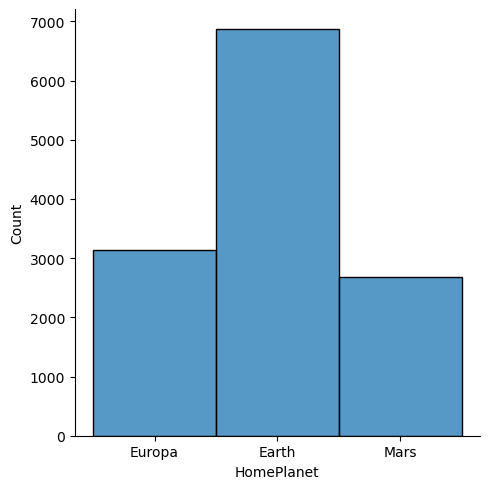

In [12]:
sns.displot(df['HomePlanet'])

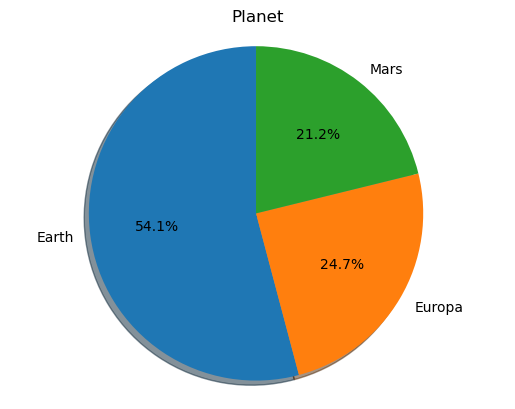

In [13]:
home_count = df['HomePlanet'].value_counts()
home_percent = home_count / len(training)
sizes = home_percent.values*100

labels = ["Earth", "Europa", "Mars"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Planet')
plt.savefig('figures/planet_pie_chart.png')
plt.show() 

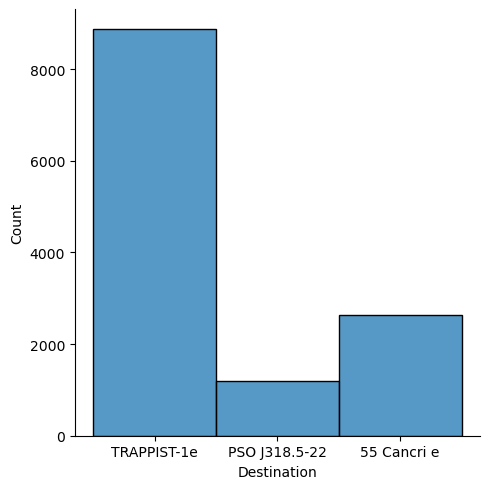

In [14]:
sns.displot(df['Destination'])

In [15]:
destination_count = df['Destination'].value_counts()
destination_count

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [16]:
labels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"]

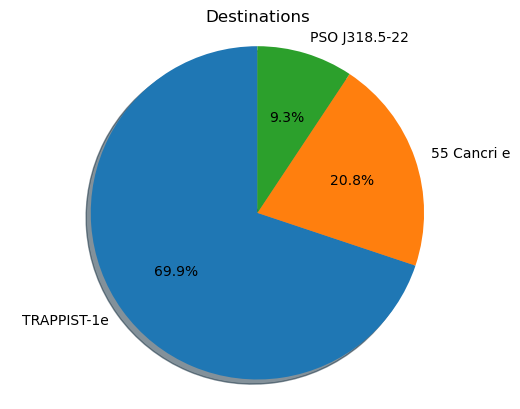

In [17]:
destination_percent = destination_count / len(df)
sizes = destination_percent.values*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Destinations')
plt.savefig('figures/destination_pie_chart.png')
plt.show() 

In [18]:
all_features = df.keys()
all_features

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [19]:
selected_features = all_features[1:-2:]
selected_features

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

<AxesSubplot:>

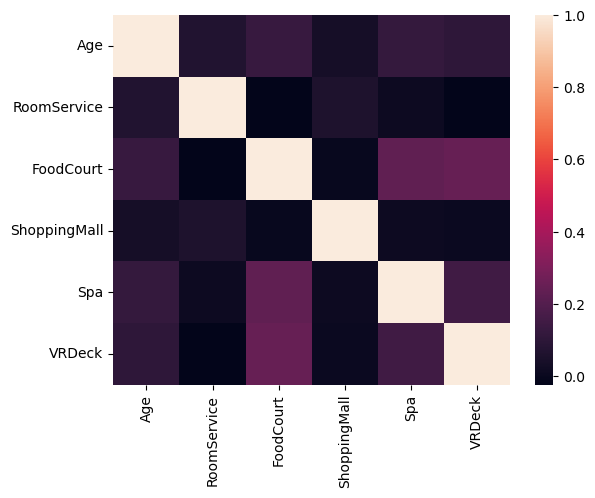

In [20]:
matrix = df[selected_features].corr()
sns.heatmap(matrix)

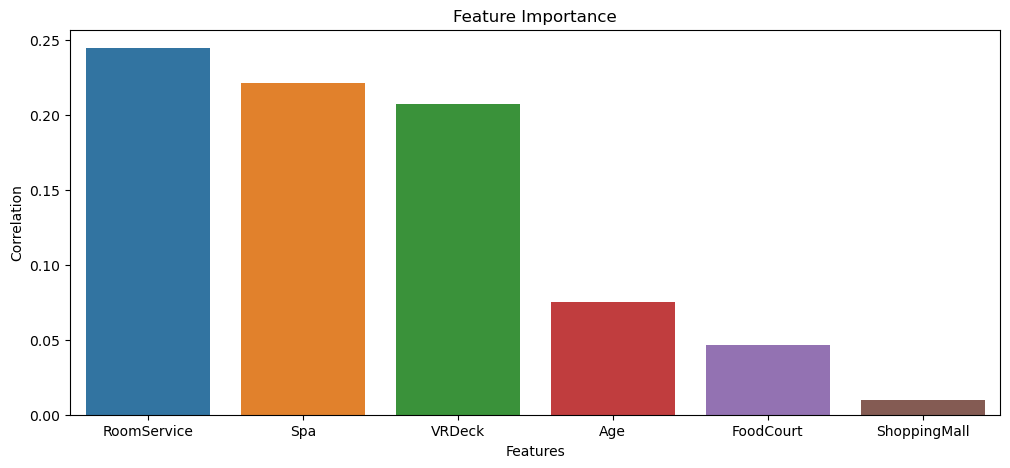

In [21]:
feature_importance = training.corr().Transported.abs().sort_values(ascending=False).drop('Transported',axis=0)
plt.figure(figsize=(12,5),dpi=100)
sns.barplot(x=feature_importance.index,y=feature_importance.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Feature Importance')
plt.savefig('figures/correlation_importance.png')

# Machine Learning Part

In [22]:
# Grouping the passengers
training['PassengerGroup'] = training.PassengerId.str.split('_',expand=True)[0].astype('int')
testing['PassengerGroup'] = testing.PassengerId.str.split('_',expand=True)[0].astype('int')

In [23]:
# HomePlanet
training['HomePlanet'] = training['HomePlanet'].fillna(value='NA')
testing['HomePlanet'] = testing['HomePlanet'].fillna(value='NA')

# VIP
training['VIP'] = training['VIP'].fillna(value=False)
testing['VIP'] = testing['VIP'].fillna(value=False)

# CryoSleep
training['CryoSleep'] = training['CryoSleep'].fillna(value=False)
testing['CryoSleep'] = testing['CryoSleep'].fillna(value=False)

# Age
training['Age'] = training['Age'].fillna(training.groupby('PassengerGroup')['Age'].transform('median'))
training['Age'] = training['Age'].fillna(training.groupby('HomePlanet')['Age'].transform('median'))

testing['Age'] = testing['Age'].fillna(testing.groupby('PassengerGroup')['Age'].transform('median'))
testing['Age'] = testing['Age'].fillna(testing.groupby('HomePlanet')['Age'].transform('median'))

training['Adult'] = 1
training.loc[training['Age']<18, 'Adult'] = 0

testing['Adult'] = 1
testing.loc[testing['Age']<18, 'Adult'] = 0

# Cabin
training['CabinDeck'] = training['Cabin'].str.split('/',expand=True)[0]
testing['CabinDeck'] = testing['Cabin'].str.split('/',expand=True)[0]
training['CabinDeck'] = training['CabinDeck'].fillna(value='NA')
testing['CabinDeck'] = testing['CabinDeck'].fillna(value='NA')

training['CabinSide'] = training['Cabin'].str.split('/',expand=True)[2]
testing['CabinSide'] = testing['Cabin'].str.split('/',expand=True)[2]
training['CabinSide'] = training['CabinSide'].fillna(value='NA')
testing['CabinSide'] = testing['CabinSide'].fillna(value='NA')

# Destination
destination_dic = {'TRAPPIST-1e':'A','55 Cancri e':'B','PSO J318.5-22':'C'}
training['Destination'] = training['Destination'].map(destination_dic)
training['Destination'] = training['Destination'].fillna(value='NA')
testing['Destination'] = testing['Destination'].map(destination_dic)
testing['Destination'] = testing['Destination'].fillna(value='NA')



In [24]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck and fill them with 0s
training[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = training[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(value=0)
testing[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = testing[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(value=0)

In [25]:
# Total Spend
training['TotalSpend'] = training['RoomService']+training['FoodCourt']+training['ShoppingMall']+training['Spa']+training['VRDeck']
testing['TotalSpend'] = testing['RoomService']+testing['FoodCourt']+testing['ShoppingMall']+testing['Spa']+testing['VRDeck']

In [26]:
# Family Name
training['FamilyName'] = training['Name'].str.split(' ',expand=True)[1]
training['FamilyName'] = training['FamilyName'].fillna('NA')

testing['FamilyName'] = testing['Name'].str.split(' ',expand=True)[1]
testing['FamilyName'] = testing['FamilyName'].fillna('NA')

combined['FamilyName'] = combined['Name'].str.split(' ',expand=True)[1]
combined['FamilyName'] = combined['FamilyName'].fillna('NA')

family_name_dictionary = combined['FamilyName'].value_counts().to_dict()
family_name_dictionary['NA'] = 0

training['FamilyMember'] = training['FamilyName']
training['FamilyMember'] = training['FamilyMember'].map(family_name_dictionary)

testing['FamilyMember'] = testing['FamilyName']
testing['FamilyMember'] = testing['FamilyMember'].map(family_name_dictionary)

In [27]:
drop = ['PassengerId','PassengerGroup','Cabin','Name','FamilyName']
passenger_id = testing['PassengerId']
training = training.drop(drop,axis=1)
testing = testing.drop(drop,axis=1)

In [28]:
convert_features = ['CryoSleep','VIP','Transported']
training[convert_features] = training[convert_features].astype(int)
testing[convert_features[:-1]] = testing[convert_features[:-1]].astype(int)

In [29]:
training

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Adult,CabinDeck,CabinSide,TotalSpend,FamilyMember
0,Europa,0,A,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,B,P,0.0,3
1,Earth,0,A,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,F,S,736.0,4
2,Europa,0,A,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,A,S,10383.0,7
3,Europa,0,A,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,A,S,5176.0,7
4,Earth,0,A,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,F,S,1091.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,B,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,A,P,8536.0,3
8689,Earth,1,C,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,G,S,0.0,5
8690,Earth,0,A,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,G,S,1873.0,8
8691,Europa,0,B,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,E,S,4637.0,7


# Feature Scaling of the Data

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
main_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend','FamilyMember']

scaler = StandardScaler()
training_scaled = scaler.fit_transform(training[main_features])
testing_scaled = scaler.transform(testing[main_features])

training_scaled = pd.DataFrame(data=training_scaled,columns=main_features)
testing_scaled = pd.DataFrame(data=testing_scaled,columns=main_features)

encoded_features = ['HomePlanet','CryoSleep','Destination','VIP','CabinDeck','CabinSide','Adult']

train_cat_encoded = pd.get_dummies(training[encoded_features],drop_first=True)
test_cat_encoded = pd.get_dummies(testing[encoded_features],drop_first=True)

In [32]:
X = pd.concat([training_scaled,train_cat_encoded],axis=1)
X_test_samples = pd.concat([testing_scaled,test_cat_encoded],axis=1)
y = training['Transported']

# Logistic Regression Classifier

In [33]:
#Logisitic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105)

In [35]:
def model_prediction(model,name,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)
    
    accuracy_train_score = round(accuracy_score(y_train,X_train_pred)*100,3)
    accuracy_test_score = round(accuracy_score(y_test,X_test_pred)*100,3)
    precision_score_ = round(precision_score(y_test,X_test_pred)*100,3)
    recall_score_ = round(recall_score(y_test,X_test_pred)*100,3)
    f1_score_ = round(f1_score(y_test,X_test_pred)*100,3)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",accuracy_train_score,'%')
    print(f"Accuracy_Score of {model} model on Testing Data is:",accuracy_test_score,'%')
    
    print(f"Precision Score of {model} model is:",precision_score_,'%')
    print(f"Recall Score of {model} model is:",recall_score_,'%')
    print(f"F1 Score of {model} model is:",f1_score_,'%')

    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,X_test_pred)
    cm = cm/ cm.astype(np.float).sum(axis=1)
    plt.figure(figsize=(7,3))
    sns.heatmap(cm,annot=True, fmt=".2f")
    plt.show()
    
    return accuracy_train_score,accuracy_test_score,precision_score_,recall_score_,f1_score_

Accuracy_Score of LogisticRegression(C=0.001, random_state=60, solver='liblinear') model on Training Data is: 78.258 %
Accuracy_Score of LogisticRegression(C=0.001, random_state=60, solver='liblinear') model on Testing Data is: 78.336 %
Precision Score of LogisticRegression(C=0.001, random_state=60, solver='liblinear') model is: 75.729 %
Recall Score of LogisticRegression(C=0.001, random_state=60, solver='liblinear') model is: 84.366 %
F1 Score of LogisticRegression(C=0.001, random_state=60, solver='liblinear') model is: 79.814 %
Confusion Matrix of LogisticRegression(C=0.001, random_state=60, solver='liblinear') model is:


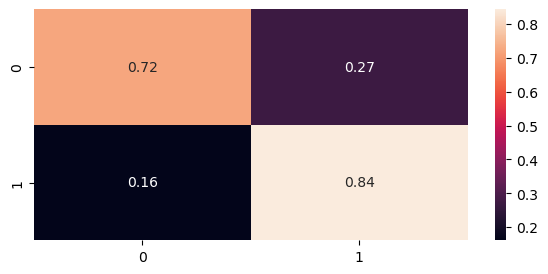

In [36]:
logistic_name = 'Logistic Regression Classifier'
log_model = LogisticRegression(C=0.001, penalty='l2', solver='liblinear', random_state=60)
logistic_accuracy_train_score,logistic_accuracy_test_score,logistic_precision_score,logistic_recall_score,logistic_f1_score=model_prediction(log_model,logistic_name,X_train, X_test, y_train, y_test)

# Random Forest Classifier

Accuracy_Score of RandomForestClassifier(max_depth=5, random_state=42) model on Training Data is: 77.913 %
Accuracy_Score of RandomForestClassifier(max_depth=5, random_state=42) model on Testing Data is: 75.23 %
Precision Score of RandomForestClassifier(max_depth=5, random_state=42) model is: 79.124 %
Recall Score of RandomForestClassifier(max_depth=5, random_state=42) model is: 69.562 %
F1 Score of RandomForestClassifier(max_depth=5, random_state=42) model is: 74.035 %
Confusion Matrix of RandomForestClassifier(max_depth=5, random_state=42) model is:


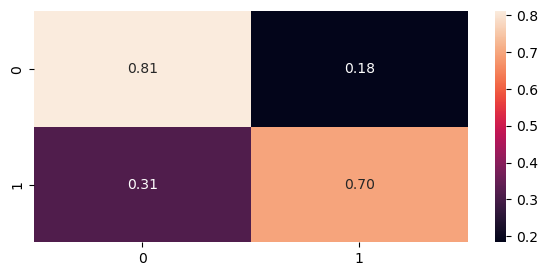

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfs_name = 'Random Forest Classifier'
rfs_model = RandomForestClassifier(max_depth=5, random_state=42)
rfs_accuracy_train_score,rfs_accuracy_test_score,rfs_precision_score,rfs_recall_score,rfs_f1_score=model_prediction(rfs_model,rfs_name,X_train, X_test, y_train, y_test)

# Support Vector Machine Classifier

Accuracy_Score of SVC(gamma='auto') model on Training Data is: 80.74 %
Accuracy_Score of SVC(gamma='auto') model on Testing Data is: 78.911 %
Precision Score of SVC(gamma='auto') model is: 79.452 %
Recall Score of SVC(gamma='auto') model is: 78.852 %
F1 Score of SVC(gamma='auto') model is: 79.151 %
Confusion Matrix of SVC(gamma='auto') model is:


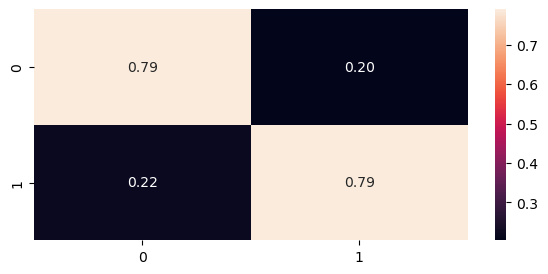

In [38]:
from sklearn.svm import SVC
svm_name = 'Support Vector Machine Classifier'
svm_model = SVC(gamma='auto')
svm_accuracy_train_score,svm_accuracy_test_score,svm_precision_score,svm_recall_score,svm_f1_score=model_prediction(svm_model,svm_name,X_train, X_test, y_train, y_test)

# K-NN Classifier

Accuracy_Score of KNeighborsClassifier(n_neighbors=7) model on Training Data is: 83.451 %
Accuracy_Score of KNeighborsClassifier(n_neighbors=7) model on Testing Data is: 76.994 %
Precision Score of KNeighborsClassifier(n_neighbors=7) model is: 78.414 %
Recall Score of KNeighborsClassifier(n_neighbors=7) model is: 75.453 %
F1 Score of KNeighborsClassifier(n_neighbors=7) model is: 76.905 %
Confusion Matrix of KNeighborsClassifier(n_neighbors=7) model is:


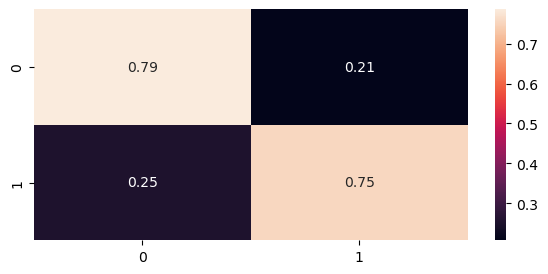

In [39]:
from sklearn.neighbors import KNeighborsClassifier
K = 7
knn_name = 'KNN Classifier'
knn_model = KNeighborsClassifier(n_neighbors=K)
knn_accuracy_train_score,knn_accuracy_test_score,knn_precision_score,knn_recall_score,knn_f1_score=model_prediction(knn_model,knn_name,X_train, X_test, y_train, y_test)

# Naive-Bayes Classifier

Accuracy_Score of MultinomialNB() model on Training Data is: 75.563 %
Accuracy_Score of MultinomialNB() model on Testing Data is: 75.575 %
Precision Score of MultinomialNB() model is: 79.234 %
Recall Score of MultinomialNB() model is: 70.317 %
F1 Score of MultinomialNB() model is: 74.51 %
Confusion Matrix of MultinomialNB() model is:


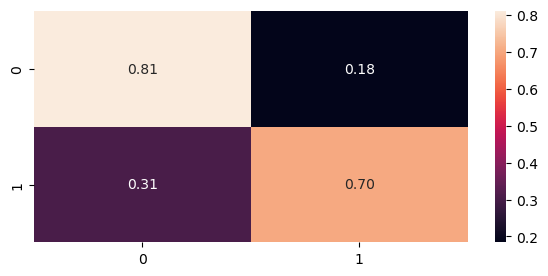

In [40]:
from sklearn.naive_bayes import MultinomialNB
# X_scaled_naive = scaler.fit_transform(X[main_features])
# test_df_scaled_naive = scaler.fit_transform(test_df[main_features])
# X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(X_scaled_naive,y,test_size=0.2,random_state=0)

X_train_naive, X_test_naive, y_train_naive, y_test_naive = np.abs(X_train),np.abs(X_test),np.abs(y_train),np.abs(y_test)

naive_model = MultinomialNB()

naive_name = 'Naive-Bayes Classifier'
#naive_accuracy_train_score,naive_accuracy_test_score,naive_precision_score,naive_recall_score,naive_f1_score=model_prediction(naive_model,naive_name,X_train, X_test, y_train, y_test)
naive_accuracy_train_score,naive_accuracy_test_score,naive_precision_score,naive_recall_score,naive_f1_score=model_prediction(naive_model,naive_name,X_train_naive, X_test_naive, y_train_naive, y_test_naive)

# Decision Tree Classifier

Accuracy_Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model on Training Data is: 79.556 %
Accuracy_Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model on Testing Data is: 77.952 %
Precision Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model is: 76.171 %
Recall Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model is: 82.326 %
F1 Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model is: 79.129 %
Confusion Matrix of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model is:


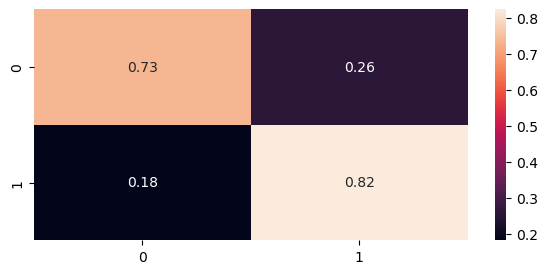

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_name = 'Decision Tree Classifier'
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_accuracy_train_score,dt_accuracy_test_score,dt_precision_score,dt_recall_score,dt_f1_score=model_prediction(dt_model,dt_name,X_train, X_test, y_train, y_test)
#dt_accuracy_train_score,dt_accuracy_test_score,dt_precision_score,dt_recall_score,dt_f1_score=model_prediction(DecisionTreeClassifier(random_state=0),dt_name,X_train, X_test, y_train, y_test)

In [42]:
training_score = [logistic_accuracy_train_score,rfs_accuracy_train_score,svm_accuracy_train_score,knn_accuracy_train_score,naive_accuracy_train_score,dt_accuracy_train_score]
testing_score = [logistic_accuracy_test_score,rfs_accuracy_test_score,svm_accuracy_test_score,knn_accuracy_test_score,naive_accuracy_test_score,dt_accuracy_test_score]
precision_score = [logistic_precision_score,rfs_precision_score,svm_precision_score,knn_precision_score,naive_precision_score,dt_precision_score]
recall_score = [logistic_recall_score,rfs_recall_score,svm_recall_score,knn_recall_score,naive_recall_score,dt_recall_score]
f1_score = [logistic_f1_score,rfs_f1_score,svm_f1_score,knn_f1_score,naive_f1_score,dt_f1_score]

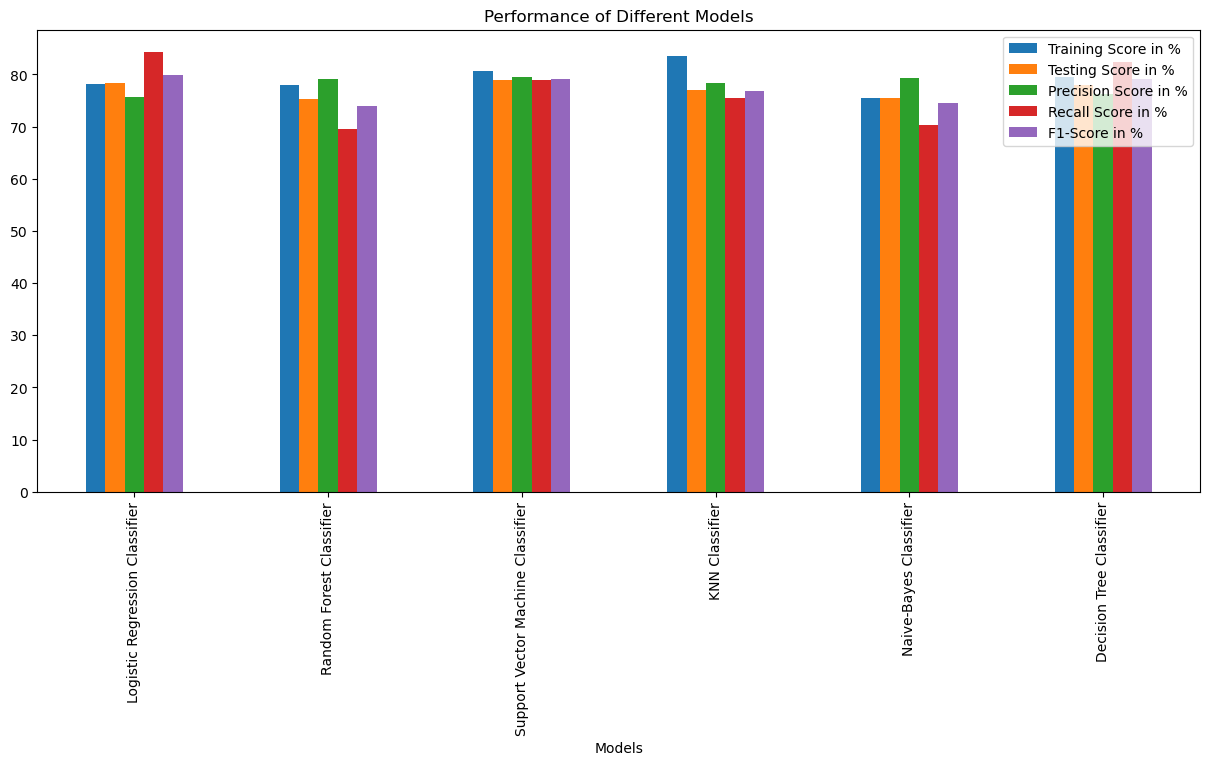

In [43]:
model_names = [logistic_name,rfs_name,svm_name,knn_name,naive_name,dt_name]
ml_df = pd.DataFrame({"Models":model_names,
                   "Training Score in %":training_score,
                   "Testing Score in %":testing_score,
                   'Precision Score in %':precision_score,
                    'Recall Score in %':recall_score,
                    'F1-Score in %':f1_score
                     })
ml_df.plot(x="Models",y=["Training Score in %","Testing Score in %",'Precision Score in %','Recall Score in %','F1-Score in %'], figsize=(15,6),kind="bar",
        title="Performance of Different Models")
plt.savefig('figures/model_performance_chart.png')
plt.show()

# Optimization of Models

# Submissions

In [44]:
# Submission Process
model=dt_model
predictions = model.predict(X_test_samples)
submissions = pd.DataFrame({'PassengerId': passenger_id, 'Transported': predictions})
submissions['Transported'] = submissions['Transported'].astype('bool')
submissions.to_csv("submissions/spaceship_prediction.csv",index=False)

# References:

https://github.com/kumod007/Titanic-Spaceship-Kaggle-Competition-End-To-End-Project/blob/main/titanic-spaceship-competition-end-to-end-project%20(2).ipynb

https://github.com/MalayAgr/Kaggle-Spaceship-Titanic/blob/main/logistic_regression_baselines.ipynb

https://www.youtube.com/watch?v=mSusDGZhkVU